In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# Define dataset path
data_folder = "ASL/asl_alphabet_train"



# Load dataset
dataset = ImageFolder(root=data_folder)
print(f"dataset: {len(dataset)} images")
# Split into train, val, test sets
train_size = int(0.8 * len(dataset))  # 70% for training
val_size = int(0.1 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size  # Remaining for testing

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

print(f"Training set: {len(train_set)} images")
print(f"Validation set: {len(val_set)} images")
print(f"Testing set: {len(test_set)} images")


dataset: 87000 images
Training set: 69600 images
Validation set: 8700 images
Testing set: 8700 images


In [3]:
# # Define transformations for the training set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),         # Resize images to 224x224
    transforms.RandomRotation(15),         # Randomly rotate images by up to 15 degrees
    transforms.RandomHorizontalFlip(),     # Randomly flip images horizontally
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Random color adjustments
    transforms.ToTensor(),                 # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (use ImageNet mean/std)
])

# # Define transformations for the validation set
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),         # Resize images to 224x224
    transforms.ToTensor(),                 # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (use ImageNet mean/std)
])

# # Define transformations for the testing set (same as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),         # Resize images to 224x224
    transforms.ToTensor(),                 # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (use ImageNet mean/std)
])

# # Apply the transformations to the dataset splits
train_set.dataset.transform = train_transform  # Training with augmentations
val_set.dataset.transform = val_transform      # Validation without augmentations
test_set.dataset.transform = test_transform    # Testing without augmentations
# # Define the DataLoader for the test set
# test_loader = DataLoader(test_set, batch_size=64, shuffle=False)  # Set batch_size as desired


In [4]:
from torchvision.models import resnet34

# Define the number of classes
num_classes = 29 

# Load the pretrained ResNet-34 model
model = resnet34(pretrained=True)

# Replace the final classification layer (fully connected layer)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Print the model architecture (optional)
print(model)


C:\Users\USER\anaconda3\envs\ee541_work\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\envs\ee541_work\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
import torch
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    """
    Trains and validates the model.
    
        model: PyTorch model to be trained.
        train_loader: DataLoader for the training set.
        val_loader: DataLoader for the validation set.
        criterion: Loss function.
        optimizer: Optimizer for weight updates.
        device: Device to use for training (CPU or GPU).
        num_epochs: Number of epochs for training.

    Returns:
        train_loss_list: List of training losses per epoch.
        train_acc_list: List of training accuracies per epoch.
        val_loss_list: List of validation losses per epoch.
        val_acc_list: List of validation accuracies per epoch.
    """
    # Lists to store metrics for each epoch
    train_loss_list, train_acc_list = [], []
    val_loss_list, val_acc_list = [], []
    # model.train() Training mode
    # model.eval() Validation mode
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Unfreeze deeper layers after `unfreeze_epoch`
        if epoch == unfreeze_epoch:
            print("Unfreezing deeper layers...")
            for param in model.layer4.parameters():  # Unfreeze ResNet's last block
                param.requires_grad = True
                print(f"Unfreezing layer4: {any(param.requires_grad for param in model.layer4.parameters())}")
        # Training Phase
        model.train()  # Set model to training mode
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimizer step
            loss.backward() #Calculate back propagation
            optimizer.step()

            # Accumulate loss and correct predictions
            running_loss += loss.item() * inputs.size(0) #loss.item() = scalar, inputs.size(0) = batch size
            _, preds = torch.max(outputs, 1) #outputs = [batch_size, num_classes]
            running_corrects += torch.sum(preds == labels.data)

        # Calculate metrics for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset) #.double() = convert a tensor to the torch.float64 data type
        train_loss_list.append(epoch_loss)
        train_acc_list.append(epoch_acc.item())

        print(f"Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

        # Validation Phase
        model.eval()  # Set model to evaluation mode
        val_loss, val_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Accumulate loss and correct predictions
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        # Calculate metrics for the epoch
        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc.item())

        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    return train_loss_list, train_acc_list, val_loss_list, val_acc_list


In [6]:
from torchvision.models import resnet34
import torch.nn as nn
import torch.optim as optim

# Load pretrained ResNet-34 and modify for 3 classes
model = resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 29)  # Adjust for 3 classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Freeze all layers initially
for param in model.parameters():
    param.requires_grad = False

# Unfreeze only the fully connected layer
for param in model.fc.parameters():
    param.requires_grad = True
    
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)  # Experiment with learning rates


In [7]:
batch_sizes = [32] 
learning_rates = [1e-4]
epoch_values = [20]

# Training loop with freezing and unfreezing
unfreeze_epoch = 5  # Unfreeze additional layers after 5 epochs

for batch_size in batch_sizes:
    for lr in learning_rates:
        for num_epochs in epoch_values:
            print(f"Training with batch size={batch_size}, lr={lr}, epochs={num_epochs}")
            
            # Update DataLoader
            train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=8)
            val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=8)
            
            # Update Optimizer (only trainable parameters)
            optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
            
            # Train Model
            train_loss, train_acc, val_loss, val_acc = train_model(
                model, train_loader, val_loader, criterion, optimizer, device, num_epochs=num_epochs
            )


Training with batch size=32, lr=0.0001, epochs=20
Epoch 1/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [03:01<00:00, 11.97it/s]


Training Loss: 2.0387, Accuracy: 0.5957


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:34<00:00,  7.84it/s]


Validation Loss: 1.2347, Accuracy: 0.7900
Epoch 2/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:07<00:00, 17.02it/s]


Training Loss: 0.9999, Accuracy: 0.8322


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:31<00:00,  8.71it/s]


Validation Loss: 0.7597, Accuracy: 0.8645
Epoch 3/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:08<00:00, 16.98it/s]


Training Loss: 0.6984, Accuracy: 0.8713


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:31<00:00,  8.70it/s]


Validation Loss: 0.5680, Accuracy: 0.8924
Epoch 4/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:07<00:00, 17.05it/s]


Training Loss: 0.5523, Accuracy: 0.8905


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:31<00:00,  8.64it/s]


Validation Loss: 0.4646, Accuracy: 0.9059
Epoch 5/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:08<00:00, 16.90it/s]


Training Loss: 0.4663, Accuracy: 0.9055


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:32<00:00,  8.38it/s]


Validation Loss: 0.3969, Accuracy: 0.9172
Epoch 6/20
------------------------------
Unfreezing deeper layers...
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True
Unfreezing layer4: True


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:31<00:00, 14.31it/s]


Training Loss: 0.4074, Accuracy: 0.9145


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [07:45<00:00,  1.71s/it]


Validation Loss: 0.3422, Accuracy: 0.9286
Epoch 7/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:52<00:00, 12.60it/s]


Training Loss: 0.3642, Accuracy: 0.9198


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:39<00:00,  6.87it/s]


Validation Loss: 0.3071, Accuracy: 0.9348
Epoch 8/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:49<00:00, 12.80it/s]


Training Loss: 0.3308, Accuracy: 0.9272


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:35<00:00,  7.77it/s]


Validation Loss: 0.2881, Accuracy: 0.9383
Epoch 9/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:41<00:00, 13.46it/s]


Training Loss: 0.3074, Accuracy: 0.9320


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:33<00:00,  8.22it/s]


Validation Loss: 0.2588, Accuracy: 0.9434
Epoch 10/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:38<00:00, 13.74it/s]


Training Loss: 0.2864, Accuracy: 0.9357


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:31<00:00,  8.62it/s]


Validation Loss: 0.2449, Accuracy: 0.9455
Epoch 11/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:32<00:00, 14.22it/s]


Training Loss: 0.2710, Accuracy: 0.9367


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:31<00:00,  8.57it/s]


Validation Loss: 0.2317, Accuracy: 0.9511
Epoch 12/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:33<00:00, 14.17it/s]


Training Loss: 0.2565, Accuracy: 0.9408


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:32<00:00,  8.40it/s]


Validation Loss: 0.2192, Accuracy: 0.9517
Epoch 13/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:33<00:00, 14.17it/s]


Training Loss: 0.2431, Accuracy: 0.9433


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:32<00:00,  8.43it/s]


Validation Loss: 0.2117, Accuracy: 0.9525
Epoch 14/20
------------------------------


Training: 100%|█████████████████████████████████████████████████████████████████| 2175/2175 [12:21:21<00:00, 20.45s/it]


Training Loss: 0.2318, Accuracy: 0.9465


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:33<00:00,  8.16it/s]


Validation Loss: 0.1969, Accuracy: 0.9563
Epoch 15/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:32<00:00, 14.23it/s]


Training Loss: 0.2222, Accuracy: 0.9475


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:32<00:00,  8.28it/s]


Validation Loss: 0.1907, Accuracy: 0.9566
Epoch 16/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:42<00:00, 13.36it/s]


Training Loss: 0.2132, Accuracy: 0.9486


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:32<00:00,  8.48it/s]


Validation Loss: 0.1814, Accuracy: 0.9585
Epoch 17/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:43<00:00, 13.28it/s]


Training Loss: 0.2070, Accuracy: 0.9498


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:34<00:00,  7.84it/s]


Validation Loss: 0.1763, Accuracy: 0.9595
Epoch 18/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:42<00:00, 13.35it/s]


Training Loss: 0.2002, Accuracy: 0.9518


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:35<00:00,  7.64it/s]


Validation Loss: 0.1702, Accuracy: 0.9602
Epoch 19/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [02:57<00:00, 12.24it/s]


Training Loss: 0.1923, Accuracy: 0.9530


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:41<00:00,  6.53it/s]


Validation Loss: 0.1636, Accuracy: 0.9616
Epoch 20/20
------------------------------


Training: 100%|████████████████████████████████████████████████████████████████████| 2175/2175 [03:06<00:00, 11.64it/s]


Training Loss: 0.1864, Accuracy: 0.9545


Validation: 100%|████████████████████████████████████████████████████████████████████| 272/272 [00:39<00:00,  6.89it/s]

Validation Loss: 0.1578, Accuracy: 0.9620


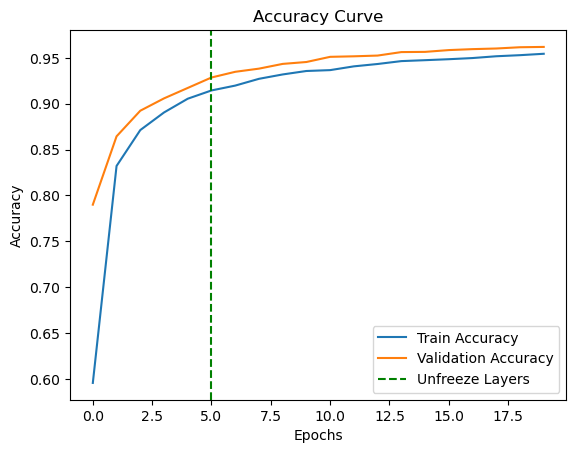

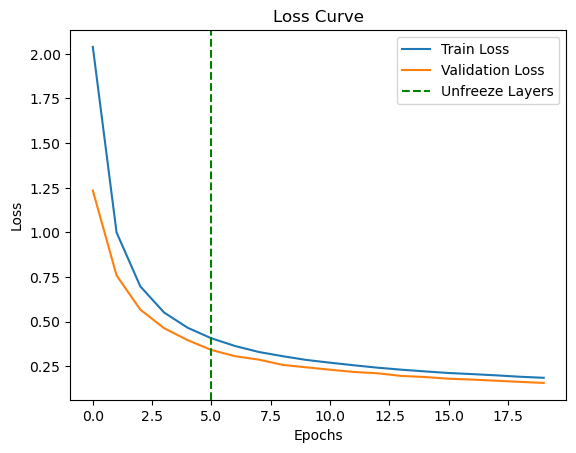

In [8]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure()
plt.plot(range(len(train_acc)), train_acc, label="Train Accuracy")
plt.plot(range(len(val_acc)), val_acc, label="Validation Accuracy")
plt.axvline(x=unfreeze_epoch, color="green", linestyle="--", label="Unfreeze Layers")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("accuracy curve.png")
plt.show()


# Plot Training and Validation Loss
plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="Train Loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation Loss")
plt.axvline(x=unfreeze_epoch, color="green", linestyle="--", label="Unfreeze Layers")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss curve.png")
plt.show()



In [9]:
from torchvision.models import resnet34
import torch.nn as nn
import torch
from tqdm import tqdm

# # Load ResNet-34 with pretrained weights
# model_pretrained = resnet34(pretrained=True)
# model.to(device)
# # Replace the fully connected layer to match the number of classes in your dataset
# num_classes = 29  # Replace with the actual number of classes
# model_pretrained.fc = nn.Linear(model_pretrained.fc.in_features, num_classes)

# # Set the model to evaluation mode
# model_pretrained.eval()
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)  # Set batch_size as desired

def evaluate_model(model, test_loader, device):
    """
    Evaluates the model on the test set and computes accuracy.

    Args:
        model: PyTorch model to be evaluated.
        test_loader: DataLoader for the test set.
        device: Device to perform evaluation (CPU or GPU).

    Returns:
        test_acc: Accuracy of the model on the test set.
    """
    model.to(device)
    model.eval()  # Set the model to evaluation mode
    test_corrects = 0
    test_total = 0

    with torch.no_grad():  # Disable gradient calculations for evaluation
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get predicted classes
            
            # Count correct predictions
            test_corrects += torch.sum(preds == labels.data)
            test_total += labels.size(0)
    
    # Calculate accuracy
    test_acc = test_corrects.double() / test_total
    return test_acc.item()


# Fine-tuned model (assume it's already trained)
testing_accuracy = evaluate_model(model, test_loader, device)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Evaluating: 100%|████████████████████████████████████████████████████████████████████| 136/136 [01:36<00:00,  1.41it/s]

Testing Accuracy: 0.9609
